#Numerical Differentiation Problem Statement

A numerical grid is an evenly spaced set of points over the domain of a function (i.e., the independent variable), over some interval. The spacing or step size of a numerical grid is the distance between adjacent points on the grid. For the purpose of this text, if $x$ is a numerical grid, then $x_j$ is the $j^t$$^h$ point in the numerical grid and h is the spacing between $x_j$$_−$$_1$ and $x_j$. The following figure shows an example of a numerical grid.


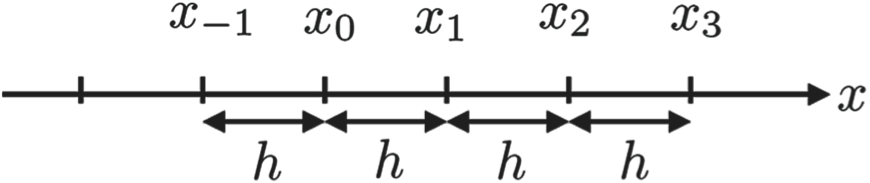

There are several functions in Python that can be used to generate numerical grids. For numerical grids in one dimension, it is sufficient to use the linspace function, which you have already used for creating regularly spaced arrays.

In Python, a function $f(x)$ can be represented over an interval by computing its value on a grid. Although the function itself may be continuous, this **discrete** or **discretized** representation is useful for numerical calculations and corresponds to data sets that may be acquired in engineering and science practice. Specifically, the function value may only be known at discrete points. For example, a temperature sensor may deliver temperature versus time pairs at regular time intervals. Although temperature is a smooth and continuous function of time, the sensor only provides values at discrete time intervals, and in this particular case, the underlying function would not even be known.

Whether $f$ is an analytic function or a discrete representation of one, we would like to derive methods of approximating the derivative of $f$ over a numerical grid and determine their accuracy.

#Finite Difference Approximating Derivatives

In finite difference approximations of this slope, we can use values of the function in the neighborhood of the point $x=a$ to achieve the goal. 

The **forward difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_j,f(x_j))$ and $(x_j$$_+$$_1$$,f(x_j$$_+$$_1$$))$:

$f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}$

The **backward difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$:

$f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}$

The **central difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1},f(x_{j+1}))$:

$f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}$

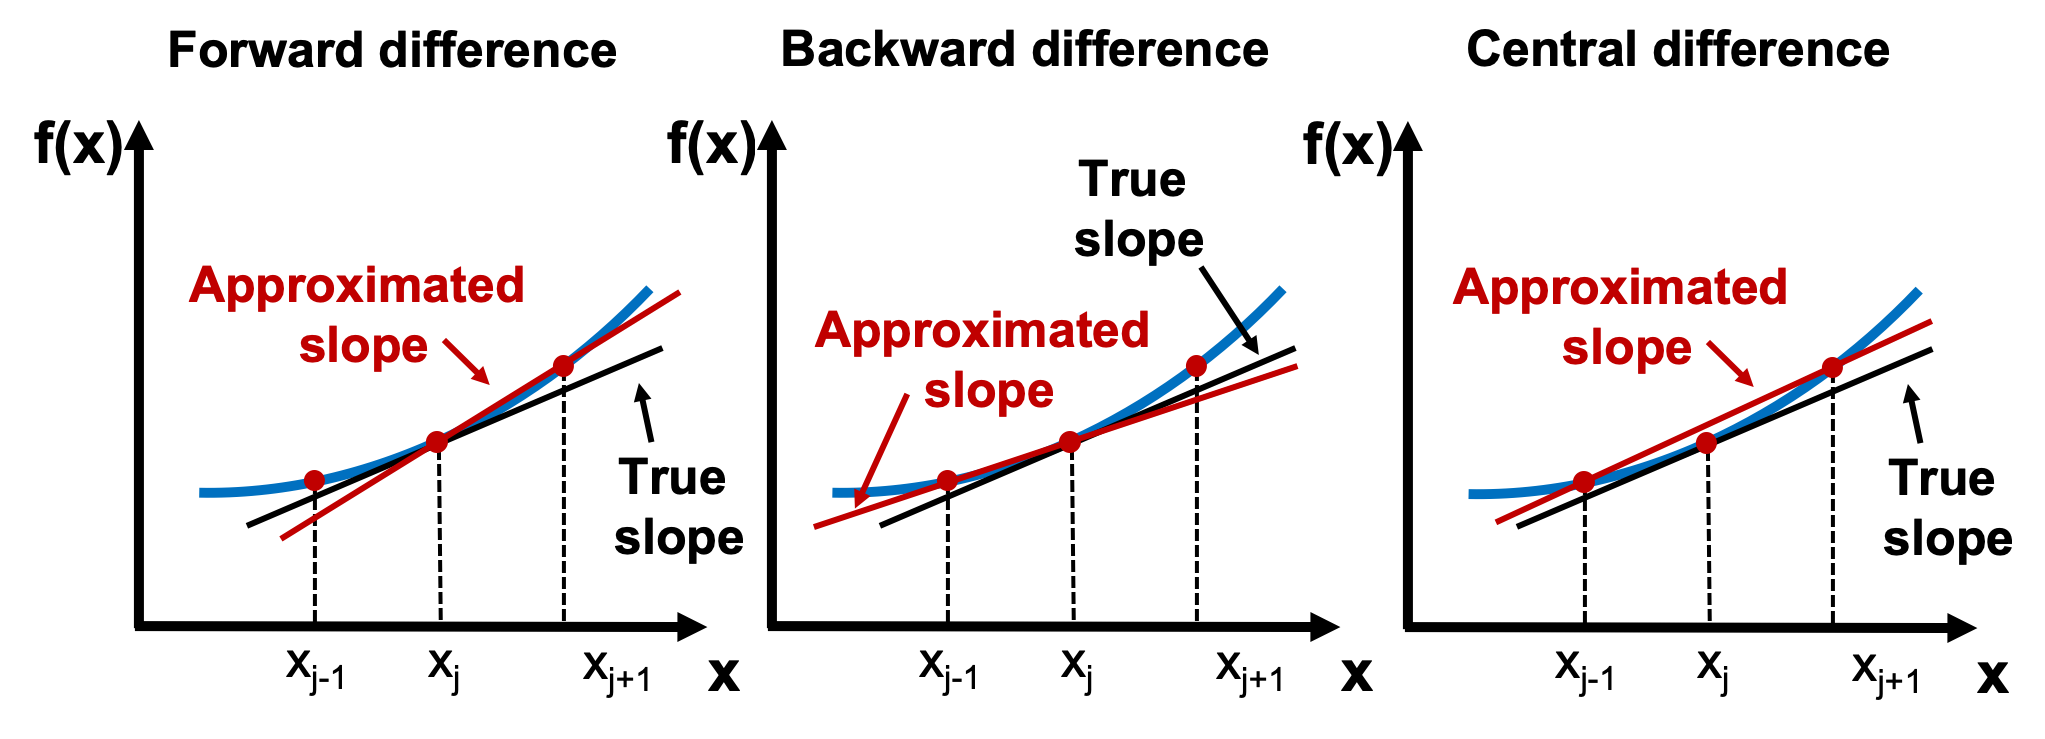


##Finite Difference Approximating Derivatives with Taylor Series

By computing the Taylor series around $a=x_{j}$ at $x=x_{j+1}$ and again solving for $f′(x_j)$, we get the **forward difference** formula:

$f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h}$

By computing the Taylor series around $a=x_j$ at $x=x_{j−1}$ and again solving for $f′(x_j)$, we get the **backward difference** formula:

$f^{\prime}(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{h}$

By computing the Taylor series around $a=x_{j}$ at both $x=x_{j-1}$ and $x=x_{j+1}$ and again solving for $f′(x_j)$, we get the the **central difference** formula:

$f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{2h}$

The following figure shows the forward difference (line joining $(x_j,y_j)$ and $(x_{j+1},y_{j+1}))$, backward difference (line joining $(x_j,y_j)$ and $(x_{j−1},y_{j−1}))$, and central difference (line joining $(x_{j−1},y_{j−1})$ and $(x_{j+1},y_{j+1}))$ approximation of the derivative of a function $f$. As can be seen, the difference in the value of the slope can be significantly different based on the size of the step $h$ and the nature of the function.


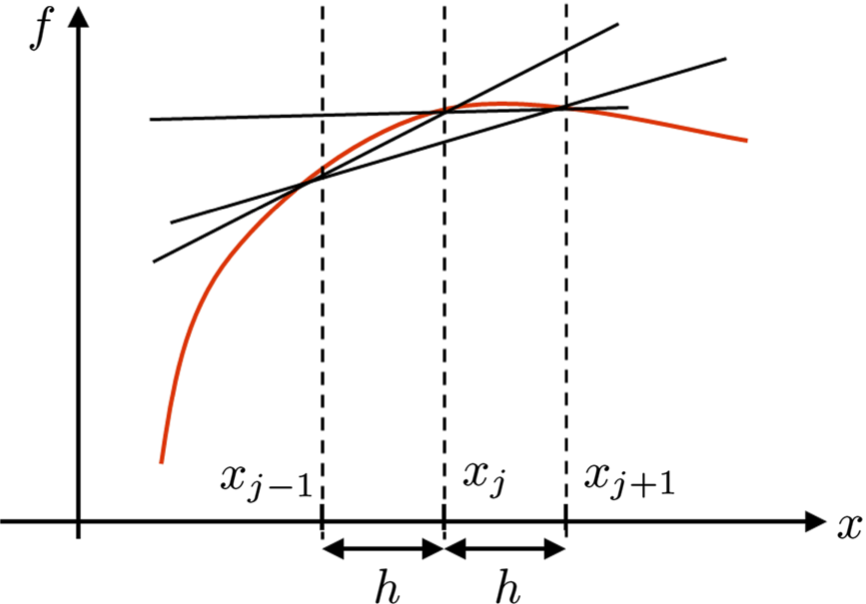

In [ ]:
def my_der_calc(f,a,method,h):
  if method == 'central':
    return (f(a + h) - f(a - h))/(2*h)
  elif method == 'forward':
    return (f(a + h) - f(a))/h
  elif method == 'backward':
    return (f(a) - f(a - h))/h

In [ ]:
import numpy as np

f = lambda x: np.sin(x) + x**2 + np.exp(4*x)
d1 = my_der_calc(f, 0, 'forward', 0.1)
d2 = my_der_calc(f, 0, 'backward', 0.1)
d3 = my_der_calc(f, 0, 'central', 0.1)
print('The forward difference is of function f is', d1)
print('The backward difference is of function f is', d2)
print('The central difference is of function f is', d3)

The forward difference is of function f is 6.016581142880986
The backward difference is of function f is 4.195133706111888
The central difference is of function f is 5.1058574244964365


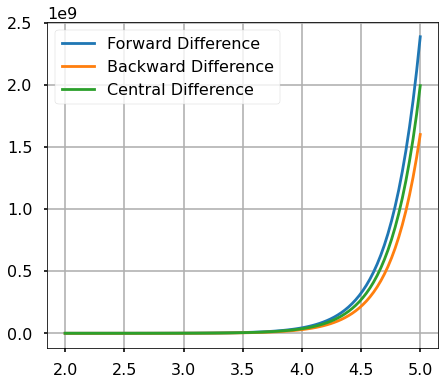

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(2,5,100)
f = lambda x: np.sin(x) + x**2 + np.exp(4*x)

dif1 = my_der_calc(f, x, 'forward', 0.1)
dif2 = my_der_calc(f, x, 'backward', 0.1)
dif3 = my_der_calc(f, x, 'central', 0.1)

plt.figure(figsize=(7,6))
plt.plot(x,dif1,label='Forward Difference')
plt.plot(x,dif2,label='Backward Difference')
plt.plot(x,dif3,label='Central Difference')
plt.legend()
plt.grid(True)
plt.show()

#Approximating of Higher Order Derivatives

Let's plot the Taylor polynomial $T_3(x)$ of degree 3 centered at $x=0$ for $sin(x) + x^2 + e^{4x}$ over the interval $x\in [0,5]$. 

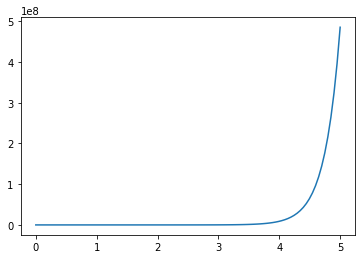

In [ ]:
x = np.linspace(0,5,100)
f = lambda x: np.sin(x) + x**2 + np.exp(4*x)
y = f(x)
plt.plot(x,y);
plt.show()

In [ ]:
from scipy.misc import derivative
a0 = f(0) #n=0
a1 = derivative(f,0,dx=0.1,n=1) #n=1
a2 = derivative(f,0,dx=0.1,n=2) / 2  #n=2
a3 = derivative(f,0,dx=0.1,n=3, order=5) / 6  #n=3
print(a0)
print(a1)
print(a2)
print(a3)

1.0
5.1058574244964365
9.107237183845482
10.93397134723284


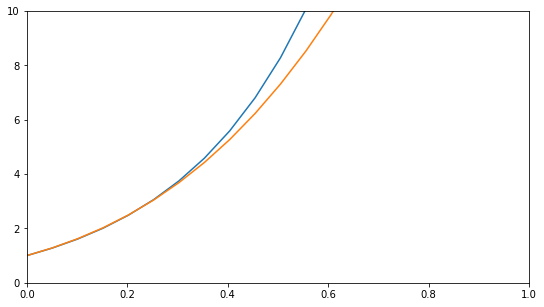

In [ ]:
T3 = a0 + a1*x + a2*x**2 + a3*x**3
plt.figure(figsize=(9,5))
plt.plot(x,y,x,T3), plt.xlim([0,1]), plt.ylim([0,10]);
plt.show()

#Numerical Differentiation with Noise

We numerically compute the derivative of a simple cosine wave corrupted by a small sin wave. Consider the following two functions:

$f(x) = \cos(x)$ and $f_{\epsilon,\omega}(x) = \cos(x)+\epsilon \sin(\omega x)$

where $0 < \epsilon\ll1$ is a very small number and $\omega$ is a large number. When $\epsilon$ is small, it is clear that $f\simeq f_{\epsilon,\omega}$. To illustrate this point, we plot $f_{\epsilon,\omega}(x)$ for $\epsilon = 0.01$ and $\omega = 100$ , and we can see it is very close to $f(x)$, as shown in the following figure.

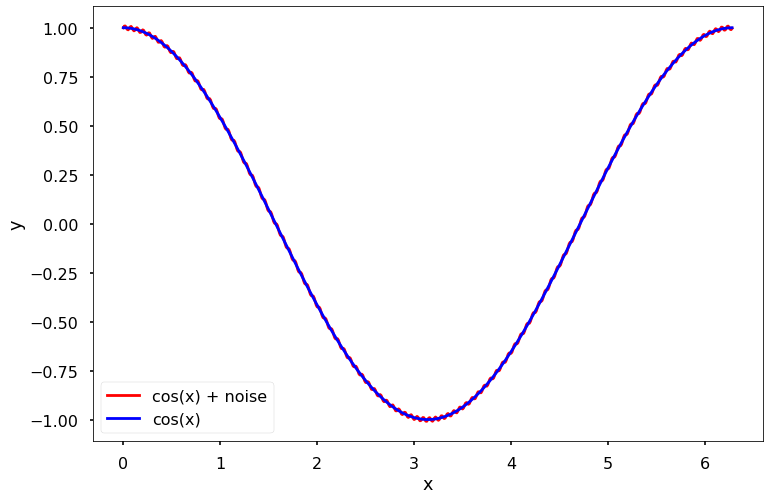

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

The derivatives of our two test functions are $f^{\prime}(x) = -\sin(x)$ and $f_{\epsilon,\omega}^{\prime}(x) = -\sin(x)+\epsilon\omega \cos(\omega x)$.

Since $\epsilon\omega$ may not be small when $\omega$ is large, the contribution of the noise to the derivative may not be small. As a result, the derivative (analytic and numerical) may not be usable. For instance, the following figure shows $f^{\prime}(x)$ and $f^{\prime}_{\epsilon,\omega}(x)$ for $\epsilon = 0.01$ and $\omega = 100$.


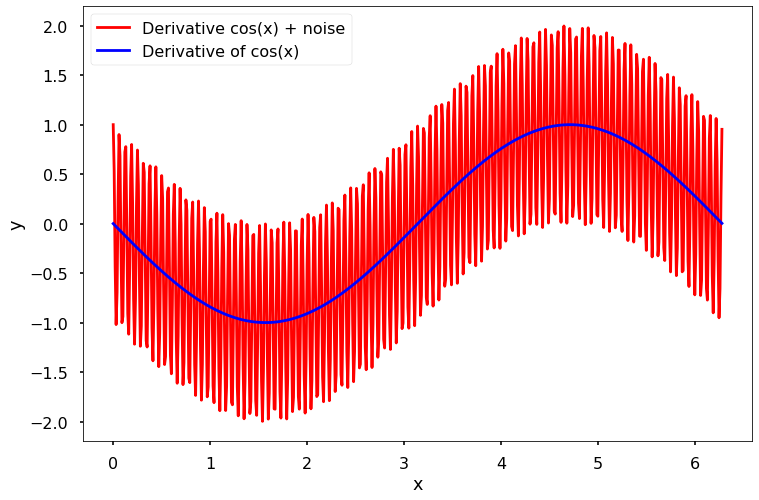

In [ ]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
y = -np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()